In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/saveecobot_20084.csv')
df = df.drop(['value_text'], axis=1)
df.head()

,device_id,phenomenon,value,logged_at
0,20084,pm10,13.60,2022-01-18 17:10:06
1,20084,pm25,5.50,2022-01-18 17:10:06
2,20084,heca_temperature,24.15,2022-01-18 17:10:06
3,20084,heca_humidity,38.78,2022-01-18 17:10:06
4,20084,min_micro,1297.00,2022-01-18 17:10:06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5527719 entries, 0 to 5527718
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   device_id   int64  
 1   phenomenon  object 
 2   value       float64
 3   logged_at   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 168.7+ MB


In [4]:
df.describe()

,device_id,value
count,5527719.0,5.527719e+06
mean,20084.0,1.042228e+05
std,0.0,3.069797e+05
min,20084.0,-9.600000e+01
25%,20084.0,7.420000e+00
50%,20084.0,3.035000e+01
75%,20084.0,1.266000e+03
max,20084.0,1.318547e+07


In [5]:
df.isnull().sum()

device_id     0
phenomenon    0
value         0
logged_at     0
dtype: int64

In [6]:
df['logged_at'] = pd.to_datetime(df['logged_at'])
df

,device_id,phenomenon,value,logged_at
0,20084,pm10,13.60,2022-01-18 17:10:06
1,20084,pm25,5.50,2022-01-18 17:10:06
2,20084,heca_temperature,24.15,2022-01-18 17:10:06
3,20084,heca_humidity,38.78,2022-01-18 17:10:06
4,20084,min_micro,1297.00,2022-01-18 17:10:06
...,...,...,...,...
5527714,20084,pressure_pa,1006549.60,2025-09-21 09:27:45
5527715,20084,humidity,44.78,2025-09-21 09:27:45
5527716,20084,min_micro,282.00,2025-09-21 09:27:45
5527717,20084,max_micro,25762.00,2025-09-21 09:27:45


In [7]:
df.loc[df['phenomenon'] == 'pressure_pa', 'value'] /= 1000

In [8]:
df['phenomenon'] = df['phenomenon'].replace({'pressure_pa': 'pressure_kpa'})

In [9]:
df['logged_at'] = pd.to_datetime(df['logged_at'])
df['hour'] = df['logged_at'].dt.hour
df['month'] = df['logged_at'].dt.month

In [10]:
phenomenons = list(df['phenomenon'].unique())
colors = ['lightcoral', 'palegreen', 'lightblue', 'plum', 'lightpink']

In [11]:
num_categories = len(phenomenons)
num_cols = 2
num_rows = (num_categories + num_cols - 1) // num_cols
confidence_interval = 0.95

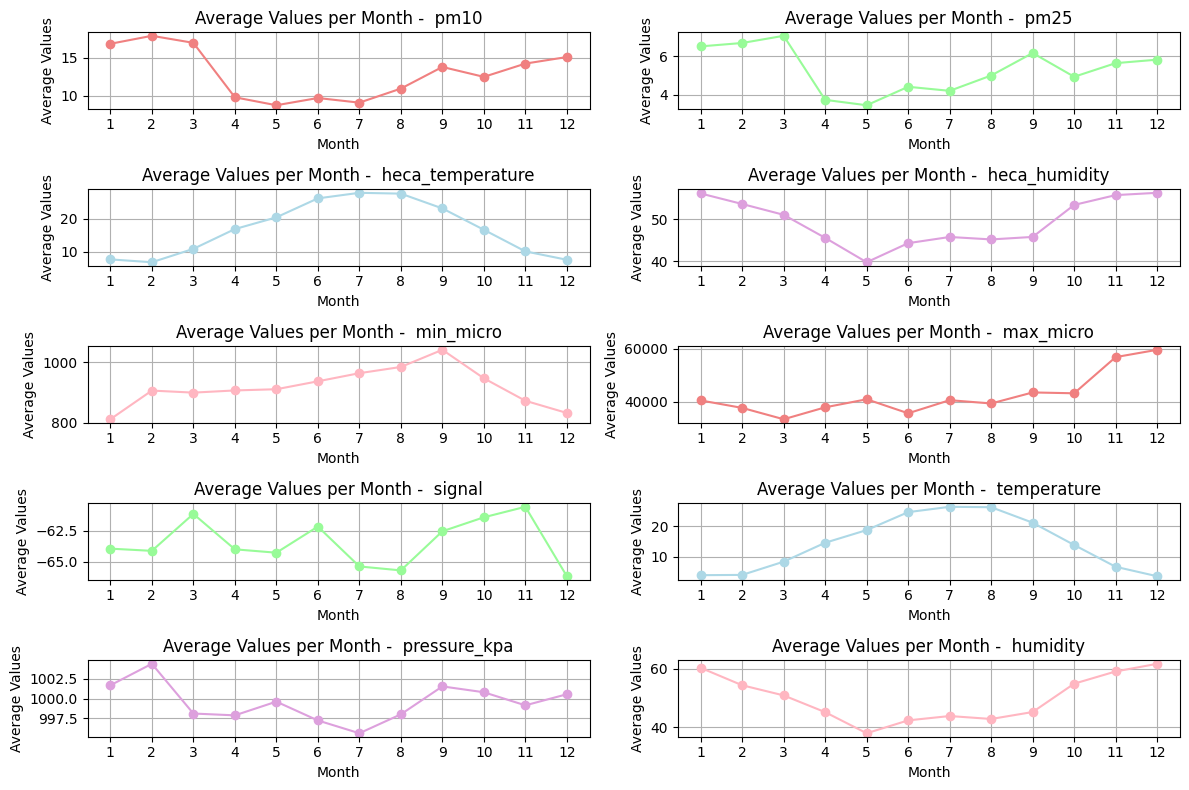

In [12]:

average_values = df.groupby(['phenomenon', 'month'])['value'].mean().reset_index()
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, phenomenon_category in enumerate(phenomenons):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    subset_df = average_values[average_values['phenomenon'] == phenomenon_category]
    ax.plot(subset_df['month'], subset_df['value'], marker='o', color=colors[i % len(colors)])
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Values')
    ax.set_title(f'Average Values per Month -  {phenomenon_category}')
    ax.grid(True)
    ax.set_xticks(range(1, 13))

for i in range(num_categories, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

/tmp/ipykernel_61432/512494940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25['logged_at'] = pd.to_datetime(pm25['logged_at'])
/tmp/ipykernel_61432/512494940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25['hour'] = pm25['logged_at'].dt.hour


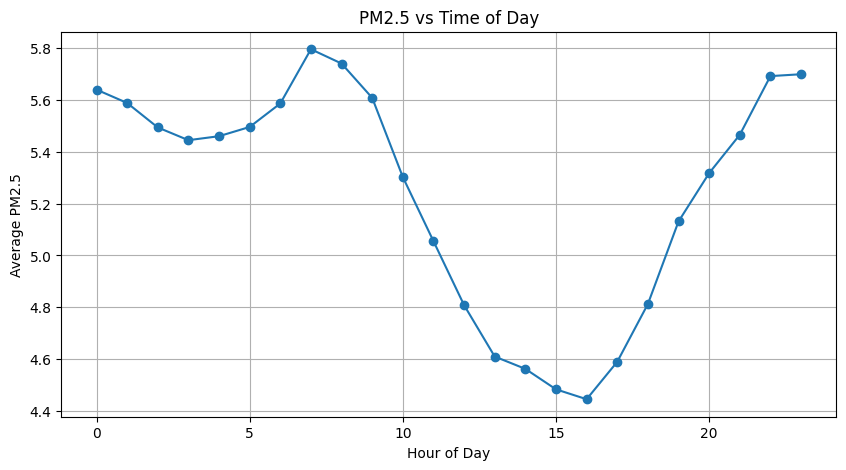

In [13]:
pm25 = df[df['phenomenon'] == 'pm25']
pm25['logged_at'] = pd.to_datetime(pm25['logged_at'])
pm25['hour'] = pm25['logged_at'].dt.hour


hourly_mean = pm25.groupby('hour')['value'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_mean.index, hourly_mean.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average PM2.5')
plt.title('PM2.5 vs Time of Day')
plt.grid(True)
plt.show()


In [14]:
X = pm25[['hour']]
y = pm25['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 score: 0.0010450243501766154
MSE: 21.30937483068356
